<a href="https://colab.research.google.com/github/christophermalone/stat360/blob/main/Handout8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Handout #8 : Simple Linear Regression - Matrix Representation

<table width='100%' ><tr><td bgcolor='green'></td></tr></table>

## Nutrition Data

Consider the following data collected on a variety of menu items from various fast-food restaurants.  
<table>
  <tr>
    <td width='50%'>
      <ul>
          <li>Restaurant: Name of restaurant</li>
          <li>Item: Menu item</li>
          <li>Type: Type of menu item, e.g. sub, pizza, wrap, sandwich, etc</li>
          <li>Breakfast: Is this primarily a breakfast item</li>
          <li>ServingSize: Serving Size</li>
          <li>Calories: Calories per serving</li>
          <li>TotalFat: Total fat per serving</li>
          <li>SaturatedFat: Saturated fat per serving</li>
          <li>Cholesterol: Cholesterol per serving</li>
          <li>Sodium: Sodium per serving</li>
          <li>TotalCarbs: Total carbs per serving</li>
          <li>Fiber: Fiber per serving</li>
          <li>Sugar: Sugar per serving</li>
          <li>Protein: Protein per serving</li>
        </ul>
    </td>
  <td width='50%'>
 
<p align='center'><img src="https://drive.google.com/uc?export=view&id=1od0unQ8y1mSNiuBPX3gSUBG6QDIDnXBD" width='50%' height='50%'></img></p>

  </td>
</tr>
</table>

Data Folder: [OneDrive](https://mnscu-my.sharepoint.com/:f:/g/personal/aq7839yd_minnstate_edu/EmOQfrwxzzRBqq8PH_8qTmMBy-1qKgM11Hb8vzjs025EEA?e=wyShYs)



<table width='100%' ><tr><td bgcolor='green'></td></tr></table>



## Load Data into R via URL

The tidyverse R package will be used to assist with reading in the dataset into the current R session.

In [1]:
#@title Load Tidyverse
#load tidyverse package
library(tidyverse)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.4     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   2.0.1     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



## Read in the data

In [2]:
#@title Read in Data

# Reading data in using read_csv 
Nutrition <- read_csv("http://www.StatsClass.org/stat360/Datasets/Nutrition.csv")

Rows: 196 Columns: 14

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (4): Restaurant, Item, Type, Breakfast
dbl (10): ServingSize, Calories, TotalFat, SaturatedFat, Cholesterol, Sodium...


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



View the first few rows of the data.frame.

In [ ]:
#@title View the first few rows of data
head(Nutrition)

Restaurant,Item,Type,Breakfast,ServingSize,Calories,TotalFat,SaturatedFat,Cholesterol,Sodium,TotalCarbs,Fiber,Sugar,Protein
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Subway,BLT,Sub,No,151,320,9.0,4,20,680,43,5,6,15
Subway,Black Forest Ham,Sub,No,221,290,4.5,1,25,830,46,5,8,18
Subway,Buffalo Chicken,Sub,No,269,420,15.0,3,55,1130,46,5,8,25
Subway,Chicken Bacon Ranch Melt,Sub,No,293,570,28.0,10,95,1080,47,5,8,35
Subway,Cold Cut Combo,Sub,No,235,370,13.0,4,50,1140,46,5,7,18
Subway,Italian BMT,Sub,No,228,410,16.0,6,45,1300,46,5,8,20


## Obtain the desired subset of data

The model to be fit to data that meet the following conditions.  A filter() can be used in subset the data.


*    Restaurant = Wendys



In [3]:
Wendys <- (Nutrition
  %>% filter(Restaurant == "Wendys")
  %>% select(Restaurant, Item, SaturatedFat, Calories)
)

Before preceding, check the data.frame to ensure that the filtering/selecting was done correctly.

In [4]:
Wendys

Restaurant,Item,SaturatedFat,Calories
<chr>,<chr>,<dbl>,<dbl>
Wendys,Daves Hot N Juicy 1/4 lb Single,14.0,580
Wendys,Daves Hot N Juicy 1/2 lb Double,21.0,800
Wendys,Daves Hot N Juicy 3/4 lb Triple,30.0,1060
Wendys,Baja Salad Half Size,10.0,470
Wendys,Asiago Ranch Chicken Club,12.0,740
Wendys,Baconator,27.0,970
Wendys,Baconator Single,17.0,660
Wendys,Son of Baconator,18.0,700
Wendys,Jr Bacon Cheeseburger,9.0,400


## Simple Linear Regression - Model Setup

Consider the following setup for the simple linear regression model.

<ul>
  <li><strong>Response Variable</strong>: SaturatedFat</li>
  <li><strong>Independent / Predictor Variable</strong>: Calories</li>
  <li><i>Assume</i> the following structure for the mean and variance functions</li>
  </ul>

<ul><ul>
  <li>$E(SaturatedFat | Calories, Resturant = Wendys) = \beta_{0} + \beta_{1} * Calories$</li>
  <li>$Var(SaturatedFat | Calories, Resturant = Wendys) = \sigma^{2}$</li>
</ul></ul>

## Simple Linear Regression - Scatterplot

The following code can be used to to create a scatterplot and include simple linear regression line.

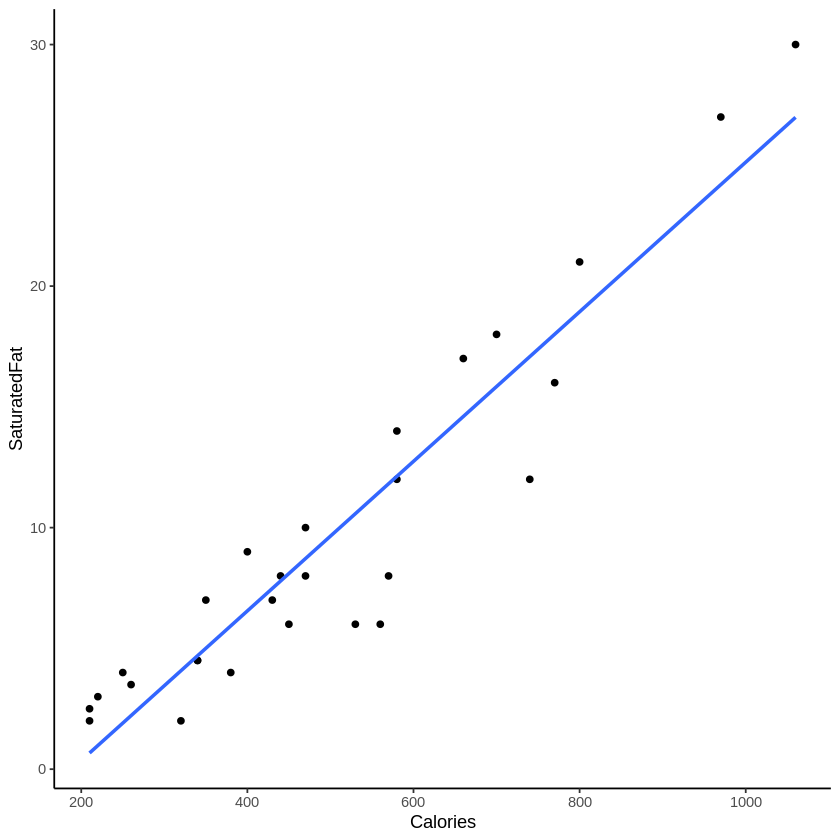

In [5]:
#@title Scatterplot with simple linear regression line
ggplot(data=Wendys, aes(x=Calories,y=SaturatedFat)) + 
  geom_point() +   
  geom_smooth(method='lm', formula = y ~ x, se=FALSE) +
  theme_classic()

## Fitting the Model

In [6]:
#@title Fitting the simple linear regression model
Wendys_Model <- lm(SaturatedFat ~ Calories, data=Wendys)

In [7]:
#@title Getting a summary of the model
summary(Wendys_Model)


Call:
lm(formula = SaturatedFat ~ Calories, data = Wendys)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.5057 -1.9513  0.7454  2.0320  3.0130 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -5.833332   1.208443  -4.827 5.30e-05 ***
Calories     0.030963   0.002205  14.044 1.19e-13 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.564 on 26 degrees of freedom
Multiple R-squared:  0.8835,	Adjusted R-squared:  0.8791 
F-statistic: 197.2 on 1 and 26 DF,  p-value: 1.19e-13


In [11]:
#@title 95% Confidence Interval for Model Parameters
round(confint(Wendys_Model),3)

,2.5 %,97.5 %
(Intercept),-8.317,-3.349
Calories,0.026,0.035


## 95% Confidence Interval and Prediction Interval

Suppose the goal is to make a prediction for a new food item with 900 Calories.  That is, determine the value for $E(SaturatedFat | Calories = 900)$

First, create a data.frame and set calories to 900.

In [12]:
NewFoodItem <- data.frame(Calories = c(900))

Next, use the predict() function to obtain a prediction for this new food item.

In [14]:
round(predict(Wendys_Model,newdata = NewFoodItem),3)

1 
22.033

Using the argument interval = "confid" in the predict() function will return the 95% Confidence Interval for this prediction.

In [16]:
predict(Wendys_Model,newdata = NewFoodItem, interval = "confid", se=TRUE)

,fit,lwr,upr
1,22.03295,19.97316,24.09275


Likewise, using the argument interval = "predict" in the predict() function will return the 95% Prediction Interval for this prediction.

In [21]:
predict(Wendys_Model,newdata = NewFoodItem, interval = "predict")

,fit,lwr,upr
1,22.03295,16.37422,27.69169


## Matrix Algebra for Fitting Models

The first step is to setup the $\bf{X}$ matrix.

In [22]:
dim(Wendys)

[1] 28  4

In [27]:
#@title Setting up the X matrix
x0 <- rep(1,28)
x1 <- Wendys$Calories

#Create the matrix
X <- cbind(x0,x1)

#Print the X matrix
print(X)

      x0   x1
 [1,]  1  580
 [2,]  1  800
 [3,]  1 1060
 [4,]  1  470
 [5,]  1  740
 [6,]  1  970
 [7,]  1  660
 [8,]  1  700
 [9,]  1  400
[10,]  1  350
[11,]  1  250
[12,]  1  220
[13,]  1  450
[14,]  1  260
[15,]  1  430
[16,]  1  340
[17,]  1  380
[18,]  1  560
[19,]  1  530
[20,]  1  340
[21,]  1  570
[22,]  1  440
[23,]  1  770
[24,]  1  210
[25,]  1  470
[26,]  1  580
[27,]  1  320
[28,]  1  210


Next, obtain a vector, say $\bf{y}$, for the response.

In [29]:
y <- Wendys$SaturatedFat

#Print the response vector
print(y)

 [1] 14.0 21.0 30.0 10.0 12.0 27.0 17.0 18.0  9.0  7.0  4.0  3.0  6.0  3.5  7.0
[16]  4.5  4.0  6.0  6.0  4.5  8.0  8.0 16.0  2.0  8.0 12.0  2.0  2.5


## Getting $(\bf{X^{'}}\bf{X})^{-1}$

In [41]:
#@title Getting X'X inverse
#First, create XpX
XpX <- t(X) %*% X
cat("XpX:\n")
print(XpX)

#Next, getting its inverse
XpXInv <- solve(XpX,diag(2))
cat("\n")
cat("XpXInv:\n")
print(XpXInv)

XpX:
      x0      x1
x0    28   14060
x1 14060 8412800

XpXInv:
            [,1]          [,2]
x0  0.2221213049 -3.712231e-04
x1 -0.0003712231  7.392778e-07


## Getting $\hat{\bf{\beta}} = (\bf{X^{'}}\bf{X})^{-1} \bf{X^{'}} \bf{y}$

In [44]:
#@title Getting the estimated model parameters
BetaHat<- XpXInv %*% t(X) %*% y
cat("Betahat:\n")
print(BetaHat)

Betahat:
          [,1]
x0 -5.83333245
x1  0.03096254


## Predicted Values and Residuals

In [50]:
#@title Getting the predicted values
yPredicted <- X %*% BetaHat
print(round(yPredicted,2))

       [,1]
 [1,] 12.12
 [2,] 18.94
 [3,] 26.99
 [4,]  8.72
 [5,] 17.08
 [6,] 24.20
 [7,] 14.60
 [8,] 15.84
 [9,]  6.55
[10,]  5.00
[11,]  1.91
[12,]  0.98
[13,]  8.10
[14,]  2.22
[15,]  7.48
[16,]  4.69
[17,]  5.93
[18,] 11.51
[19,] 10.58
[20,]  4.69
[21,] 11.82
[22,]  7.79
[23,] 18.01
[24,]  0.67
[25,]  8.72
[26,] 12.12
[27,]  4.07
[28,]  0.67


In [52]:
Residuals <- (y - yPredicted)
print(round(Residuals,2))

       [,1]
 [1,]  1.88
 [2,]  2.06
 [3,]  3.01
 [4,]  1.28
 [5,] -5.08
 [6,]  2.80
 [7,]  2.40
 [8,]  2.16
 [9,]  2.45
[10,]  2.00
[11,]  2.09
[12,]  2.02
[13,] -2.10
[14,]  1.28
[15,] -0.48
[16,] -0.19
[17,] -1.93
[18,] -5.51
[19,] -4.58
[20,] -0.19
[21,] -3.82
[22,]  0.21
[23,] -2.01
[24,]  1.33
[25,] -0.72
[26,] -0.12
[27,] -2.07
[28,]  1.83


## Getting $\hat{\sigma}^2$

The Sum-of-Squared Residuals can easily be obtained using $(\bf{r^{'}}\bf{r})$.  Dividing this by $(n-2)$ yields $\hat{\sigma}^{2} = \mbox{Mean-Squared Error}$

In [57]:
#@title Getting the variance in the conditional distribution
SigmaHatSquared <- t(Residuals)%*%Residuals / (28-2)
cat("SigmaHat-Squared\n")
print(SigmaHat)

SigmaHat-Squared
         [,1]
[1,] 6.574491


## Getting $Var(\hat{\beta})$

In [61]:
#@title Variance/Covariance of BetaHat
Var_BetaHat <- 6.57 * XpXInv
cat("Var(BetaHat): \n")
print(Var_BetaHat)

Var(BetaHat): 
           [,1]          [,2]
x0  1.459336973 -2.438936e-03
x1 -0.002438936  4.857055e-06


## The 95% Joint Confidence Region for Model Parameters for SLR

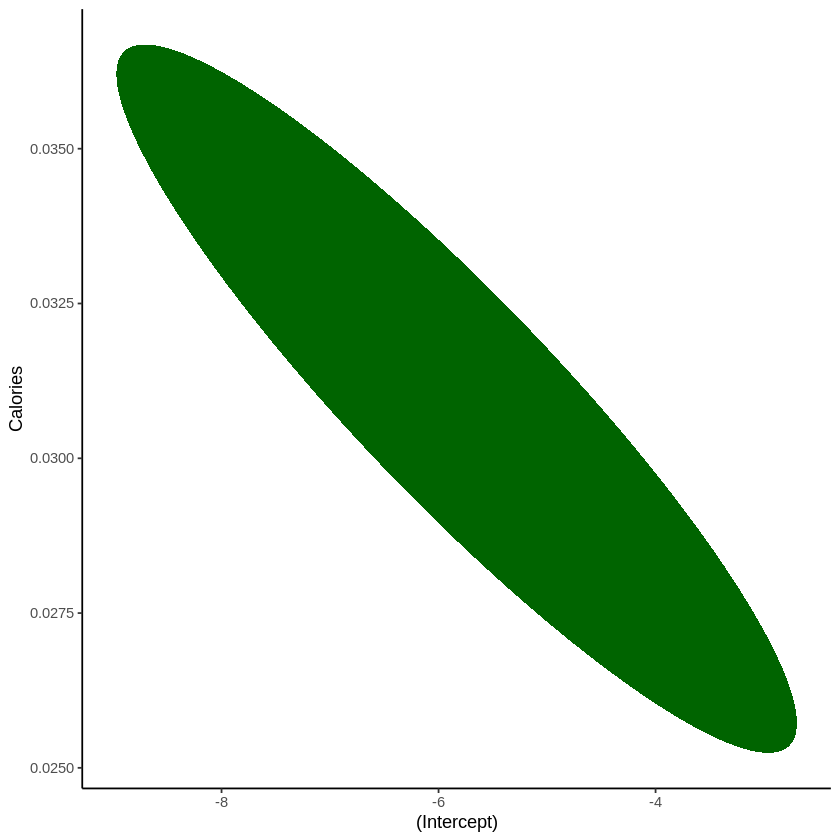

In [67]:
#@title Obtainign the 95% Confidence Ellipsoid for the Estimated Model Parameters

#Only need to install and load the ellipse library once
#install.packages("ellipse")
#library(ellipse)
joint_ci<-as.data.frame(ellipse(Wendys_Model))

#Graphing the ellipsoid 
ggplot(joint_ci, mapping=aes(x=`(Intercept)`,y=Calories)) +
geom_polygon(fill="darkgreen") +
theme_classic()


## Visualization of $R^2$

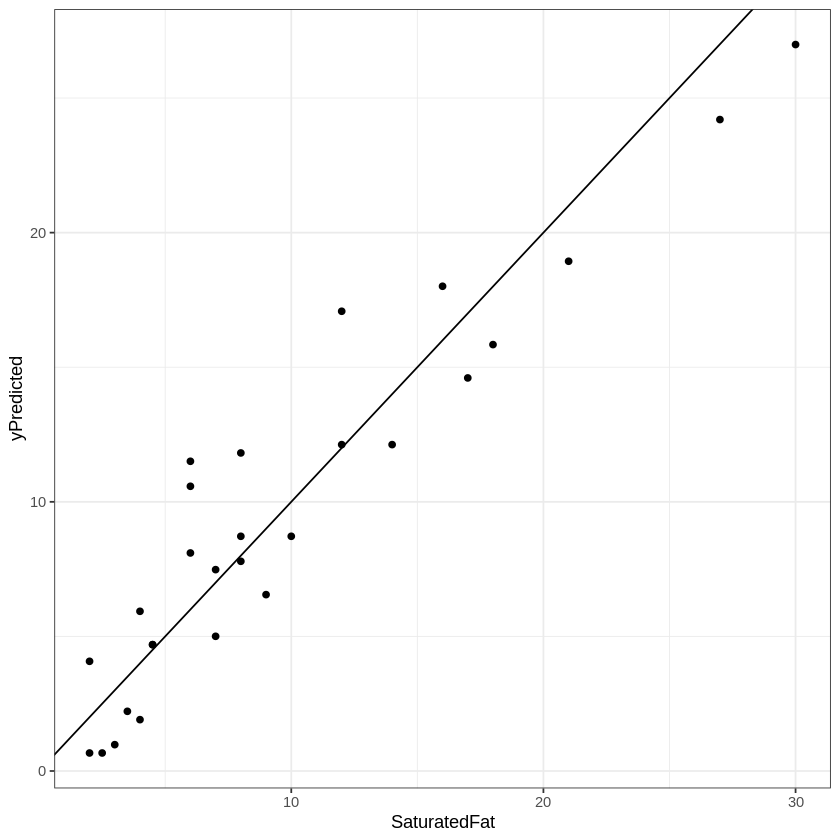

In [73]:
Wendys_withPredicted <- ( Wendys
                              %>% mutate(
                                          yPredicted = Wendys_Model$fitted.values,
                                          Residuals = Wendys_Model$residuals
                                         )
                          )
# Creating a visualization of R^2
ggplot(Wendys_withPredicted, aes(x=SaturatedFat, y=yPredicted)) +
    geom_point() +
    geom_abline(intercept = 0, slope = 1) +  #adds y=x line, i.e. line of agreement
    theme_bw()

In [79]:
round( cor(Wendys$SaturatedFat, Wendys_withPredicted$yPredicted)^2 , 4)

[1] 0.8835

## Using Matrix Algebra for a Prediction

Getting the predicted value for new food item with Calories = 900. 

In [93]:
NewFoodItem <- cbind( x0=c(1) , x1=c(900) )
NewFoodItem

x0,x1
1,900


Getting the prediction using the following formula. $$\begin{bmatrix}
1&900 \\
\end{bmatrix} * \begin{bmatrix} \hat{\beta_{0}} \\ \hat{\beta}_{1}\end{bmatrix}$$

In [94]:
Prediction_Calories900 <- NewFoodItem %*% BetaHat
Prediction_Calories900

22.03295


Note:  The variance for a linear comibination of the estimated model parameters is given by 

$$
Var({\bf{r}} * \hat{\bf{\beta}}) = {\bf{r}} * Var(\hat{\bf{\beta}})*{\bf{r}}^{'} 
$$

Using the above result, the variance for a prediction can be computed as

In [99]:
NewFoodItem %*% Var_BetaHat %*% t(NewFoodItem)

1.003468


The standard deviation for this linear combination of the estimated model parameters is given by the following quantity.

In [111]:
round( sqrt( NewFoodItem %*% Var_BetaHat %*% t(NewFoodItem) ) , 3)

1.002


The 95% Confidence Interval for this prediction is given by the following code.

In [109]:
LowerCI <- 22.03295 - qt(0.975,df=26) * sqrt(1.003468)
UpperCI <- 22.03295 + qt(0.975,df=26) * sqrt(1.003468)

cat("The 95% CI is for this prediction is",round(LowerCI,2), "up to",round(UpperCI,2),".\n")

The 95% CI is for this prediction is 19.97 up to 24.09 .


The 95% Prediction Interval for this prediction is given by the following code.

In [110]:
LowerPI <- 22.03295 - qt(0.975,df=26) * sqrt(1.003468 + 6.574)
UpperPI <- 22.03295 + qt(0.975,df=26) * sqrt(1.003468 + 6.574)

cat("The 95% PI is for this prediction is",round(LowerPI,2), "up to",round(UpperPI,2),".\n")

The 95% PI is for this prediction is 16.37 up to 27.69 .


End of Document